In [1]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

In [2]:
# Generate example electrode positions and EEG measurements
num_electrodes = 64
theta = np.linspace(0, 2 * np.pi, num_electrodes, endpoint=False)
phi = np.linspace(0, np.pi, num_electrodes, endpoint=False)
theta, phi = np.meshgrid(theta, phi)
theta = theta.ravel()
phi = phi.ravel()

In [3]:
# Simulated EEG measurements
eeg_measurements = np.sin(theta) * np.cos(phi)

In [4]:
# Interpolation points (target points)
theta_interp = np.linspace(0, 2 * np.pi, 100)
phi_interp = np.linspace(0, np.pi, 50)
theta_interp, phi_interp = np.meshgrid(theta_interp, phi_interp)
theta_interp = theta_interp.ravel()
phi_interp = phi_interp.ravel()

In [5]:
# Perform spherical spline interpolation
rbf = Rbf(theta, phi, eeg_measurements, function='linear')
eeg_interp = rbf(theta_interp, phi_interp)

C:\Users\Si Thu Aung\anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


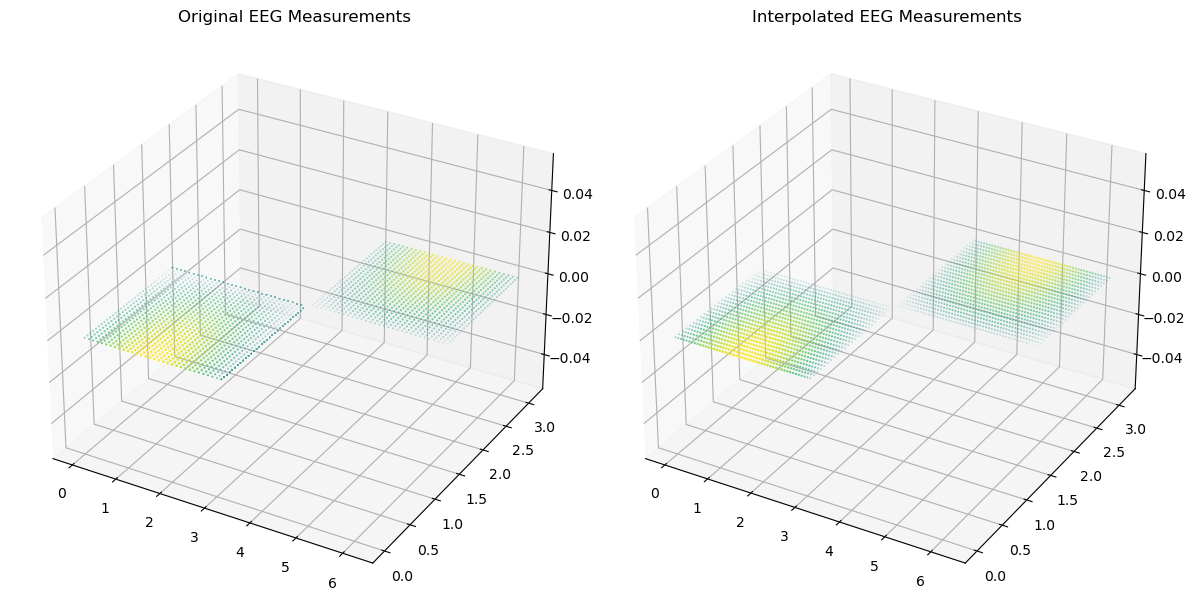

In [6]:
# Plot the original and interpolated EEG measurements
plt.figure(figsize=(12, 6))

plt.subplot(121, projection='3d')
plt.scatter(theta, phi, eeg_measurements, c=eeg_measurements, cmap='viridis')
plt.title('Original EEG Measurements')

plt.subplot(122, projection='3d')
plt.scatter(theta_interp, phi_interp, eeg_interp, c=eeg_interp, cmap='viridis')
plt.title('Interpolated EEG Measurements')

plt.tight_layout()
plt.show()